In [16]:
import matplotlib.pyplot as plt
import os, sys
import numpy as np
from glob import glob
import pandas as pd
import warnings

In [17]:
warnings.filterwarnings("ignore")

In [18]:
logfiles = glob('../testing_logs/*.log')

In [19]:
logfiles

['../testing_logs/DTN_test_512MiB-100GiB_1-procs_1fpf.log',
 '../testing_logs/DTN_test_34MiB-100GiB_4-procs_1fpf_allsubs.log',
 '../testing_logs/DTN_test_64MiB-100GiB_8-procs_1fpf_allsubs.log',
 '../testing_logs/DTN_test_256MiB-100GiB_4-procs_1fpf.log',
 '../testing_logs/DTN_test_34MiB-100GiB_12-procs_1fpf_allsubs.log',
 '../testing_logs/DTN_test_128MiB-100GiB_1-procs_1fpf.log',
 '../testing_logs/DTN_test_34MiB-100GiB_1-procs_2fpf.log',
 '../testing_logs/DTN_test_34MiB-100GiB_1-procs_1fpf.log',
 '../testing_logs/DTN_test_64MiB-100GiB_1-procs_1fpf.log',
 '../testing_logs/DTN_test_256MiB-100GiB_1-procs_1fpf.log',
 '../testing_logs/DTN_test_64MiB-100GiB_2-procs_1fpf_allsubs.log',
 '../testing_logs/DTN_test_64MiB-100GiB_4-procs_1fpf_allsubs.log',
 '../testing_logs/DTN_test_64MiB-100GiB_12-procs_1fpf_allsubs.log',
 '../testing_logs/DTN_test_512MiB-100GiB_4-procs_1fpf.log']

In [20]:
logs = []
for logfile in logfiles:
    title_name = logfile.split("/")[-1].split(".")[0]
    # Define the regular expression pattern to match the desired lines
    pattern = 'uploaded in'  # Modified pattern to match both lines

    # Lists to store the extracted data
    mbps = []
    sec_per_file = []

    with open(logfile, 'r') as lf:
        for line in lf.readlines():
            if pattern in line:
                #Possible lines:
                #3.01 MiB uploaded in 0.74 seconds, 4.09 MiB/s
                #2 files (avg 3.17 MiB/file) uploaded in 0.43 seconds, 0.22 s/file
                if 'MiB/s' in line:
                    mbps.append(float(line.split()[6])*8)
                elif 's/file' in line:
                    sec_per_file.append(float(line.split()[9]))
    if "34MiB-100GiB" in title_name:
        filesize_MiB = 34
    elif "64MiB-100GiB" in title_name:
        filesize_MiB = 64
    elif "128MiB-100GiB" in title_name:
        filesize_MiB = 128
    elif "256MiB-100GiB" in title_name:
        filesize_MiB = 256
    elif "512MiB-100GiB" in title_name:
        filesize_MiB = 512
    if "_1-procs" in title_name:
        n_procs = 1
    elif "_2-procs" in title_name:
        n_procs = 2
    elif "_4-procs" in title_name:
        n_procs = 4
    elif "_8-procs" in title_name:
        n_procs = 8
    elif "_12-procs" in title_name:
        n_procs = 12
    if "1fpf" in title_name:
        files_per_folder = 1
    elif "2fpf" in title_name:
        files_per_folder = 2
    logs.append({'title':title_name,'mbps':np.array(mbps,dtype=np.float32), 'spf':np.array(sec_per_file,dtype=np.float32), 'filesize_MiB':filesize_MiB, 'n_procs':n_procs, 'files_per_folder':files_per_folder})

In [21]:
logs

[{'title': 'DTN_test_512MiB-100GiB_1-procs_1fpf',
  'mbps': array([535.84, 555.6 , 300.24, 583.76, 578.96, 548.48, 536.48, 514.  ,
         299.12, 367.84, 447.36, 414.48, 583.2 , 579.52, 560.24, 549.68,
         335.92, 337.84, 511.84, 559.36, 520.4 , 567.6 , 489.84, 611.12,
         552.8 , 541.92, 452.32, 324.  , 535.04, 317.36, 597.44, 249.44,
         516.24, 541.36, 513.36, 577.04, 561.04, 587.68, 537.84, 655.76,
         141.68, 223.84, 553.12, 365.76, 516.16, 532.4 , 495.12, 602.08,
         298.4 , 568.72, 510.56, 462.56, 527.12, 568.72, 549.2 , 535.76,
          87.44, 184.  , 527.92, 482.4 , 562.64, 546.64, 544.24,  73.28,
         297.44, 647.6 , 497.76, 547.84, 477.6 , 588.  , 378.32, 476.48,
         567.44, 557.28, 553.84, 547.04, 451.92, 485.12, 386.24, 144.72,
         521.76, 321.36, 494.56, 540.  , 476.96, 290.24, 531.36, 498.8 ,
         533.6 , 538.8 , 494.96, 459.92, 515.28, 492.8 , 603.68, 374.72,
         533.6 , 511.36, 485.92, 520.56], dtype=float32),
  'spf':

In [22]:
logs_df = pd.DataFrame(logs).sort_values(by=['filesize_MiB','n_procs','files_per_folder']).reset_index(drop=True)
# logs_df.drop(logs_df[logs_df['files_per_folder'] == 2].index, inplace=True)

In [23]:
logs_df

,title,mbps,spf,filesize_MiB,n_procs,files_per_folder
0,DTN_test_34MiB-100GiB_1-procs_1fpf,"[218.24, 174.96, 288.0, 226.32, 244.64, 279.12...","[1.25, 1.55, 0.94, 1.2, 1.11, 0.97, 0.91, 1.07...",34,1,1
1,DTN_test_34MiB-100GiB_1-procs_2fpf,"[525.04, 599.44, 512.88, 515.28, 533.68, 483.4...","[0.52, 0.45, 0.53, 0.53, 0.51, 0.56, 0.46, 0.5...",34,1,2
2,DTN_test_34MiB-100GiB_4-procs_1fpf_allsubs,"[228.4, 235.44, 273.2, 268.32, 173.92, 254.32,...","[1.19, 1.16, 1.0, 1.01, 1.56, 1.07, 1.27, 1.17...",34,4,1
3,DTN_test_34MiB-100GiB_12-procs_1fpf_allsubs,"[245.84, 311.2, 251.04, 262.16, 297.04, 306.72...","[1.11, 0.87, 1.08, 1.04, 0.92, 0.89, 1.07, 1.2...",34,12,1
4,DTN_test_64MiB-100GiB_1-procs_1fpf,"[379.76, 337.92, 310.0, 377.2, 366.24, 258.56,...","[1.35, 1.52, 1.65, 1.36, 1.4, 1.98, 1.46, 1.52...",64,1,1
5,DTN_test_64MiB-100GiB_2-procs_1fpf_allsubs,"[407.52, 434.08, 457.36, 358.64, 478.64, 355.1...","[1.26, 1.18, 1.12, 1.43, 1.07, 1.44, 1.2, 1.21...",64,2,1
6,DTN_test_64MiB-100GiB_4-procs_1fpf_allsubs,"[304.48, 406.88, 350.0, 376.72, 410.0, 406.08,...","[1.68, 1.26, 1.46, 1.36, 1.25, 1.26, 1.33, 1.2...",64,4,1
7,DTN_test_64MiB-100GiB_8-procs_1fpf_allsubs,"[363.52, 419.2, 380.64, 408.0, 393.44, 432.64,...","[1.41, 1.22, 1.34, 1.25, 1.3, 1.18, 1.18, 1.2,...",64,8,1
8,DTN_test_64MiB-100GiB_12-procs_1fpf_allsubs,"[399.04, 369.04, 352.16, 413.44, 384.96, 447.0...","[1.28, 1.39, 1.45, 1.24, 1.33, 1.15, 1.24, 1.2...",64,12,1
9,DTN_test_128MiB-100GiB_1-procs_1fpf,"[501.68, 490.48, 475.12, 552.32, 534.0, 528.4,...","[2.04, 2.09, 2.16, 1.85, 1.92, 1.94, 1.83, 2.1...",128,1,1


DTN_test_34MiB-100GiB_1-procs_1fpf
DTN_test_34MiB-100GiB_1-procs_2fpf
DTN_test_34MiB-100GiB_4-procs_1fpf_allsubs
DTN_test_34MiB-100GiB_12-procs_1fpf_allsubs
DTN_test_64MiB-100GiB_1-procs_1fpf
DTN_test_64MiB-100GiB_2-procs_1fpf_allsubs
DTN_test_64MiB-100GiB_4-procs_1fpf_allsubs
DTN_test_64MiB-100GiB_8-procs_1fpf_allsubs
DTN_test_64MiB-100GiB_12-procs_1fpf_allsubs
DTN_test_128MiB-100GiB_1-procs_1fpf
DTN_test_256MiB-100GiB_1-procs_1fpf
DTN_test_256MiB-100GiB_4-procs_1fpf
DTN_test_512MiB-100GiB_1-procs_1fpf
DTN_test_512MiB-100GiB_4-procs_1fpf


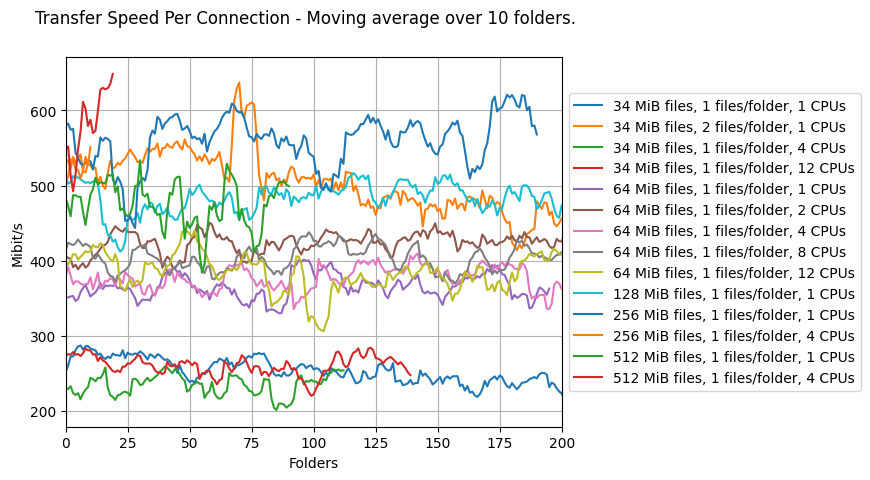

<Figure size 640x480 with 0 Axes>

In [24]:
for log in logs_df.iterrows():
    this_log = log[1]
    print(this_log['title'])
    # Create the plots
    plt.figure(1)

    # Smooth out the data by calculating the moving average
    window_size = 10
    smoothed_mib_per_sec = np.convolve(this_log['mbps'], np.ones(window_size)/window_size, mode='valid')
    smoothed_sec_per_file = np.convolve(this_log['spf'], np.ones(window_size)/window_size, mode='valid')
    plt.suptitle(f'Transfer Speed Per Connection - Moving average over {window_size} folders.')
    # Plot the smoothed data
    # plt.subplot(211)
    plt.plot(smoothed_mib_per_sec, label=f'{this_log["filesize_MiB"]:.0f} MiB files, {this_log["files_per_folder"]} files/folder, {this_log["n_procs"]} CPUs')
    plt.xlim(0, 200)
    plt.xlabel('Folders')
    plt.ylabel('Mibit/s')

    # plt.subplot(212)
    # plt.plot(smoothed_sec_per_file, label=f'{this_log["n_procs"]} procs, {this_log["files_per_folder"]} files/folder')
    # plt.xlabel('Folders')
    # plt.ylabel('s/file')

    # Add a legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.grid(True)
plt.show()
plt.tight_layout()

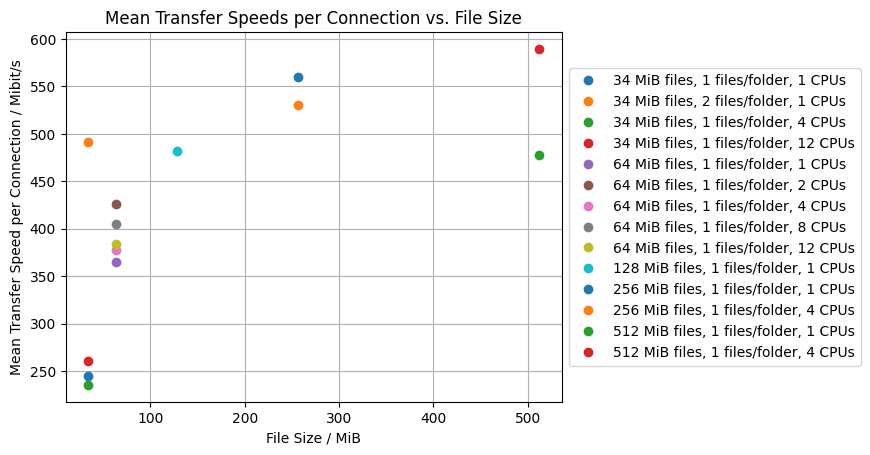

In [25]:
for log in logs_df.iterrows():
    this_log = log[1]
    #average transfer speed versus file size
    import matplotlib.pyplot as plt

    # Extract the required columns from logs_df
    file_sizes = this_log['filesize_MiB']
    mbps = this_log['mbps']

    # Calculate the mean transfer speeds in Mibit/s
    mean_mbps = np.mean(mbps, axis=0)

    # Plot the mean transfer speeds against file size
    plt.plot(file_sizes, mean_mbps, marker='o', linestyle='', label=f'{this_log["filesize_MiB"]:.0f} MiB files, {this_log["files_per_folder"]} files/folder, {this_log["n_procs"]} CPUs')
plt.xlabel('File Size / MiB')
plt.ylabel('Mean Transfer Speed per Connection / Mibit/s')
plt.title('Mean Transfer Speeds per Connection vs. File Size')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

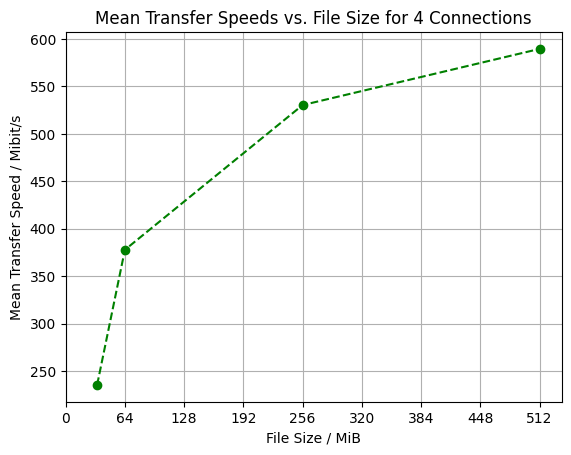

In [26]:
file_sizes = []
mean_mbps = []
# Single connection only
for log in logs_df[logs_df['n_procs'] == 4].iterrows():
    this_log = log[1]
    if this_log['files_per_folder'] != 1:
        continue

    # Extract the required columns from logs_df
    file_sizes.append(this_log['filesize_MiB'])
    mean_mbps.append(np.mean(this_log['mbps'],axis=0))

# Plot the mean transfer speeds against file size
plt.plot(file_sizes, mean_mbps, marker='o', linestyle='--', color='g')
plt.xticks(np.array([0,1,2,3,4,5,6,7,8])*64)
plt.xlabel('File Size / MiB')
plt.ylabel('Mean Transfer Speed / Mibit/s')
plt.title('Mean Transfer Speeds vs. File Size for 4 Connections')
plt.grid(True)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

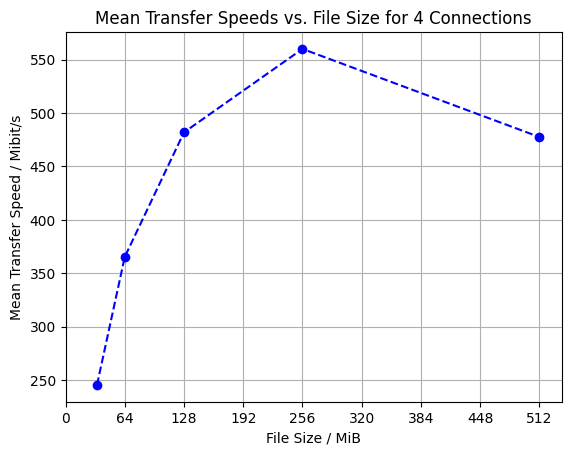

In [27]:
file_sizes = []
mean_mbps = []
# Single connection only
for log in logs_df[logs_df['n_procs'] == 1].iterrows():
    this_log = log[1]
    if this_log['files_per_folder'] != 1:
        continue

    # Extract the required columns from logs_df
    file_sizes.append(this_log['filesize_MiB'])
    mean_mbps.append(np.mean(this_log['mbps'],axis=0))

# Plot the mean transfer speeds against file size
plt.plot(file_sizes, mean_mbps, marker='o', linestyle='--', color='b')
plt.xticks(np.array([0,1,2,3,4,5,6,7,8])*64)
plt.xlabel('File Size / MiB')
plt.ylabel('Mean Transfer Speed / Mibit/s')
plt.title('Mean Transfer Speeds vs. File Size for a single Connections')
plt.grid(True)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

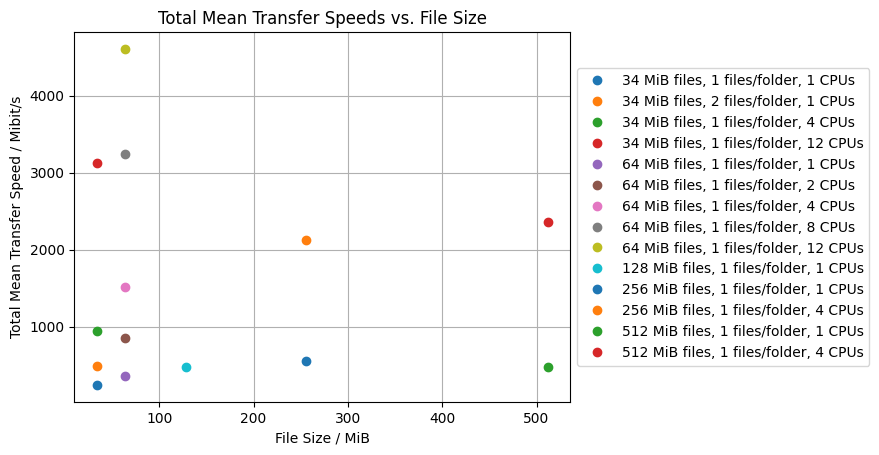

In [28]:
for log in logs_df.iterrows():
    this_log = log[1]
    #average transfer speed versus file size
    import matplotlib.pyplot as plt

    # Extract the required columns from logs_df
    file_sizes = this_log['filesize_MiB']
    mbps = this_log['mbps']
    n_procs = this_log['n_procs']

    # Calculate the mean transfer speeds in Mibit/s
    total_mean_mbps = np.mean(mbps, axis=0)*n_procs

    # Plot the mean transfer speeds against file size
    plt.plot(file_sizes, total_mean_mbps, marker='o', linestyle='', label=f'{this_log["filesize_MiB"]:.0f} MiB files, {this_log["files_per_folder"]} files/folder, {this_log["n_procs"]} CPUs')
plt.xlabel('File Size / MiB')
plt.ylabel('Total Mean Transfer Speed / Mibit/s')
plt.title('Total Mean Transfer Speeds vs. File Size')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

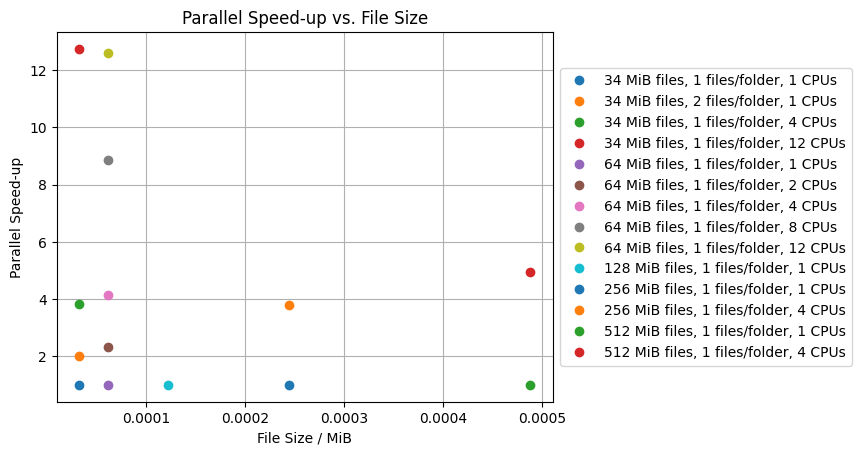

In [29]:
for log in logs_df.iterrows():
    this_log = log[1]
    #average transfer speed versus file size
    import matplotlib.pyplot as plt

    # Extract the required columns from logs_df
    file_sizes = this_log['filesize_MiB']
    mbps = this_log['mbps']
    single_cpu_mean_mbps = np.mean(logs_df[logs_df['n_procs'] == 1][logs_df['filesize_MiB'] == file_sizes]['mbps'].values[0], axis=0)
    n_procs = this_log['n_procs']

    # Calculate the mean transfer speeds in Mibit/s
    parallel_speed_up = np.mean(mbps, axis=0)*n_procs / single_cpu_mean_mbps

    # Plot the mean transfer speeds against file size
    plt.plot(file_sizes/1024**2, parallel_speed_up, marker='o', linestyle='', label=f'{this_log["filesize_MiB"]:.0f} MiB files, {this_log["files_per_folder"]} files/folder, {this_log["n_procs"]} CPUs')
plt.xlabel('File Size / MiB')
plt.ylabel('Parallel Speed-up')
plt.title('Parallel Speed-up vs. File Size')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

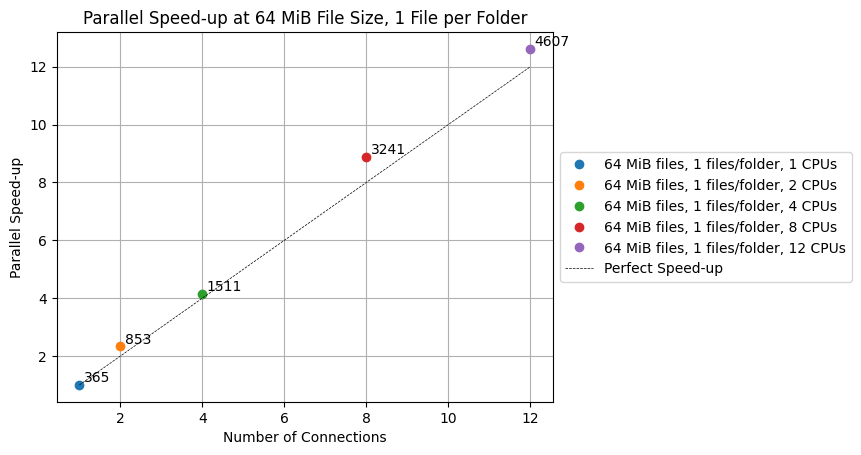

In [30]:
file_size = 64
for log in logs_df[logs_df['filesize_MiB'] == file_size].iterrows():
    this_log = log[1]
    #average transfer speed versus file size
    import matplotlib.pyplot as plt

    # Extract the required columns from logs_df
    file_sizes = this_log['filesize_MiB']
    mbps = this_log['mbps']
    single_cpu_mean_mbps = np.mean(logs_df[logs_df['n_procs'] == 1][logs_df['filesize_MiB'] == file_sizes]['mbps'].values[0], axis=0)
    n_procs = this_log['n_procs']

    # Calculate the mean transfer speeds in Mibit/s
    parallel_speed_up = np.mean(mbps, axis=0)*n_procs / single_cpu_mean_mbps
    label = f'{np.mean(mbps, axis=0)*n_procs:.0f}'
    plt.text(n_procs+0.1, parallel_speed_up+.1, label)

    # Plot the mean transfer speeds against file size
    plt.plot(n_procs, parallel_speed_up, marker='o', linestyle='', label=f'{this_log["filesize_MiB"]:.0f} MiB files, {this_log["files_per_folder"]} files/folder, {this_log["n_procs"]} CPUs')
perfect_speedup = np.linspace(1, n_procs, n_procs)
plt.plot(perfect_speedup, perfect_speedup, linestyle='--', color='black', label='Perfect Speed-up', linewidth=0.5)
plt.xlabel('Number of Connections')
plt.ylabel('Parallel Speed-up')
plt.title('Parallel Speed-up at 64 MiB File Size, 1 File per Folder')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()